# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Lecture 3 </center>

# <center>Feature Engineering</center>

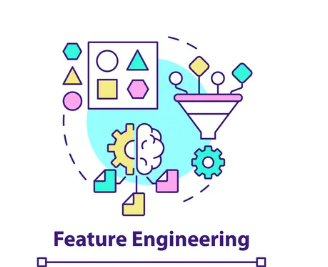

# 1. Imputing Categorical Features using sklearn

Instructions:

- Load data from loan_train.csv file. Explore to discover missing values if any.


- Use sklearn SimpleImputer to Impute the missing values with most_frequent value.



In [55]:
import pandas as pd
from sklearn.impute import SimpleImputer
df = pd.read_csv('loan_train.csv')
df.drop(columns = 'Loan_ID', inplace =True)
categorical_cols =  df.select_dtypes(include = ['object','bool'])
impute = SimpleImputer(strategy='most_frequent')
data = impute.fit_transform(categorical_cols)
ndf = pd.DataFrame(data, columns=categorical_cols.columns)
ndf.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

# 2. Encoding Categorical Features

### 2.1. Encoding Nominal Features

Instructions:

- Explore data and discover nominal features.


- Use one-hot encoding technique to encode nominal features.

In [60]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
categorical = ohe.fit_transform(df[['Gender','Married','Self_Employed']]).toarray()
categorical

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [61]:
categorical_columns = ['Gender','Married','Self_Employed']
cdf = df[categorical_columns]
dummies_df = pd.get_dummies(cdf)
dummies_df.head()

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0            1           1            0                 1   
1              0            1           0            1                 1   
2              0            1           0            1                 0   
3              0            1           0            1                 1   
4              0            1           1            0                 1   

   Self_Employed_Yes  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0

### 2.2. Encoding Ordinal Features

Instructions:

- Explore data and discover all ordinal features


- Use OrdinalEncoder to encode ordinal Features

In [54]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [69]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
ndf[['Property_Area','Education']] = oe.fit_transform(ndf[['Property_Area','Education']])
ndf.head()

Gender Married Dependents  Education Self_Employed  Property_Area  \
0   Male      No          0        0.0            No            2.0   
1   Male     Yes          1        0.0            No            0.0   
2   Male     Yes          0        0.0           Yes            2.0   
3   Male     Yes          0        1.0            No            2.0   
4   Male      No          0        0.0            No            2.0   

   Loan_Status  
0            1  
1            0  
2            1  
3            1  
4            1

### 2.3. Label Encoder

Instructions:

- Use LabelEncoder to encode target feature.


- Analyze the difference between Ordinal Encoder and Label Encoder

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ndf['Loan_Status'] = le.fit_transform(ndf.Loan_Status)
ndf.head()

Gender Married Dependents  Education Self_Employed  Property_Area  \
0   Male      No          0        0.0            No            2.0   
1   Male     Yes          1        0.0            No            0.0   
2   Male     Yes          0        0.0           Yes            2.0   
3   Male     Yes          0        1.0            No            2.0   
4   Male      No          0        0.0            No            2.0   

   Loan_Status  
0            1  
1            0  
2            1  
3            1  
4            1